Assalamualaikum, selamat pagi/siang/sore/malam bapak/ibu tim penilai.

Nama Saya Nanda Arya Putra dan email dicoding : akunpribadi413@gmail.com, 
pada project kali ini untuk memenuhi tugas akhir submission kelas pemula Machine Learning, kami ditugaskan untuk membuat program jaringan saraf tiruan (Neural Network) menggunakan TensorFlow untuk klasifikasi gambar.

Disarankan membuka program dengan Chrome, untuk menghindari masalah pada upload file local (bug dari mozilla).

Atas segala kekurangan, saya mohon maaf.
Wassalamualaikum.

Mengakses Dataset

In [2]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-26 15:05:51--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  3.98MB/s    in 60s     

2021-07-26 15:06:53 (5.10 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



Ekstrak File Zip Dataset

In [3]:
import os
import zipfile

local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

Mendefinisikan Folder Data dan Hitung total data 

In [4]:
import os

fold_gunting = os.path.join('/content/rockpaperscissors/scissors')
fold_batu = os.path.join('/content/rockpaperscissors/rock')
fold_kertas = os.path.join('/content/rockpaperscissors/paper')

print("jumlah gambar gunting :", len(os.listdir(fold_gunting)))
print("jumlah gambar batu :", len(os.listdir(fold_batu)))
print("jumlah gambar kertas :", len(os.listdir(fold_kertas)))

jumlah gambar gunting : 750
jumlah gambar batu : 726
jumlah gambar kertas : 712


Mendaftarkan dan menampilkan beberapa data perkategori

Menampilkan nama file gambar:
Gunting: ['jX4XP2bjq762S0Wj.png', 'qoU2kq8bmOjMY5e0.png', '256MrhkDete6aQhP.png', '5CzwWCDnxKOJz5T0.png', '7dBQ0fOpCs03OmnR.png']
Batu: ['j31qLVBZfstRnWsA.png', 'NjO1nKIuSLnWpnK0.png', 'Bm9hYmhGUGmKxDwK.png', 'fnIIkyRgH6znwmNp.png', 'yxZyXGFCtnDwavIo.png']
Kertas: ['7IYZ788SAadhvemj.png', 'av2NxK494nd72Q13.png', 'vPvoQzBR7Paf5Jml.png', 'n5NXfZTRonR4iOr0.png', 'UN3iCDyiEIteIMdx.png']


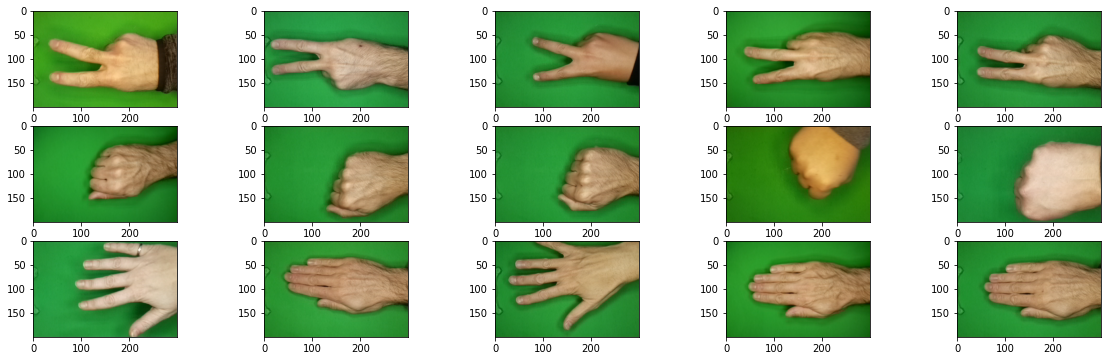

In [5]:
#---MENDAFTARKAN NAMA GAMBAR UNTUK DITAMPILKAN---#
print("Menampilkan nama file gambar:")                                     
file_gunting = os.listdir(fold_gunting)                                          
print("Gunting:",file_gunting[:5])                                                

file_batu = os.listdir(fold_batu)                                                 
print("Batu:",file_batu[:5])                                                      

file_kertas = os.listdir(fold_kertas)                                             
print("Kertas:",file_kertas[:5])                                                 

#IMPORT MODUL UNTUK MENAMPILKAN GAMBAR#
%matplotlib inline

import matplotlib.pyplot as plt                                                   
import matplotlib.image as mpimg

#---JUMLAH BARIK DAN KOLOM UNTUK MENAMPILKAN GAMBAR---#
nrows = 3                                                                         
ncols = 5                                                                       

pic_index = 0                                                                    

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 2)                                         

#---MENAMPILKAN GAMBAR---#
pic_index += 5                                                                    
gbr_tampil_gunting  = [os.path.join(fold_gunting, fname)                         
                      for fname in file_gunting[pic_index-5:pic_index]]
gbr_tampil_batu     = [os.path.join(fold_batu, fname)                           
                      for fname in file_batu[pic_index-5:pic_index]]
gbr_tampil_kertas   = [os.path.join(fold_kertas, fname)                          
                      for fname in file_kertas[pic_index-5:pic_index]]

for i, img_path in enumerate(gbr_tampil_gunting+gbr_tampil_batu+gbr_tampil_kertas):
  sp = plt.subplot(nrows, ncols, i + 1)                                                                                                         

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Memanipulasi data menggunakan ImageDataGenerator dan memecah data menjadi data training & validasi

In [6]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

#--------------------AUGMENTASI---------------------#
BASIS_DIR = "/content/rockpaperscissors/rps-cv-images/"
training_datagen = ImageDataGenerator (
    rescale = 1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    horizontal_flip=True,
    fill_mode='nearest',
#---MEMECAH DATA MENJADI DATA TRAINING & VALIDASI---#
#------DATA TRAINING 60% & DATA VALOIDASI 40%-------#
    validation_split=0.4
)

Pelabelan data training dan validasi

In [7]:
#---MENGATUR DATA TRAINING---#
training_set = training_datagen.flow_from_directory(
    BASIS_DIR,
    target_size=(100, 150),
    shuffle=True,
    class_mode='categorical',
    subset='training')
#---MENGATUR DATA VALIDASI---#
validation_set = training_datagen.flow_from_directory(
    BASIS_DIR,
    target_size=(100, 150),
    class_mode='categorical',
    shuffle =True,
    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Membangun model jaringan tiruan menggunakan model sequential

In [28]:
model = tf.keras.models.Sequential([
    #CONVULOTIONAL LAYER 1                              
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 150, 3)),
    #Max pooling untuk reduksi ukuran gambar
    tf.keras.layers.MaxPooling2D(2, 2),
    #Dropout untuk mempercepat komputasi & menghindari overfitting
    tf.keras.layers.Dropout(0.4),
    #CONVULOTIONAL LAYER 2
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    #Max pooling untuk reduksi ukuran gambar
    tf.keras.layers.MaxPooling2D(2,2),
    #CONVULOTIONAL LAYER 3
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #Max pooling untuk reduksi ukuran gambar
    tf.keras.layers.MaxPooling2D(2,2),
    #Dropout untuk mempercepat komputasi & menghindari overfitting
    tf.keras.layers.Dropout(0.4),
    
    #INPUT DEEP LEARNING
    tf.keras.layers.Flatten(),

    #HIDDEN LAYER
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),

    #OUTPUT LAYER
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 148, 64)       1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 74, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 49, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 17, 64)       

Kompilasi Model

In [29]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy'],
)

Callbacks untuk menghentikan training saat akurasi sudah melebihi 98%

In [30]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.98 and logs.get('accuracy')>0.98):
      print("\nAkurasi telah mencapai 98%!")
      self.model.stop_training = True
callbacks = myCallback()

Melatih Model

In [31]:
history = model.fit(
    training_set,                                                             
    steps_per_epoch=32,                                                            
    epochs=60,                                                                    
    validation_data=validation_set,                                         
    validation_steps=8,
    callbacks = [callbacks],                                                         
    verbose=2
    )

Epoch 1/60
32/32 - 7s - loss: 1.3593 - accuracy: 0.3431 - val_loss: 1.0852 - val_accuracy: 0.3906
Epoch 2/60
32/32 - 7s - loss: 1.0946 - accuracy: 0.3994 - val_loss: 1.0962 - val_accuracy: 0.3203
Epoch 3/60
32/32 - 7s - loss: 1.0901 - accuracy: 0.4316 - val_loss: 1.0119 - val_accuracy: 0.5664
Epoch 4/60
32/32 - 7s - loss: 0.8677 - accuracy: 0.6358 - val_loss: 0.7145 - val_accuracy: 0.6875
Epoch 5/60
32/32 - 7s - loss: 0.6029 - accuracy: 0.7545 - val_loss: 0.6736 - val_accuracy: 0.6914
Epoch 6/60
32/32 - 7s - loss: 0.5686 - accuracy: 0.7706 - val_loss: 0.4804 - val_accuracy: 0.8203
Epoch 7/60
32/32 - 7s - loss: 0.5216 - accuracy: 0.8099 - val_loss: 0.4611 - val_accuracy: 0.8477
Epoch 8/60
32/32 - 7s - loss: 0.4781 - accuracy: 0.8169 - val_loss: 0.4811 - val_accuracy: 0.8086
Epoch 9/60
32/32 - 7s - loss: 0.4611 - accuracy: 0.8249 - val_loss: 0.3469 - val_accuracy: 0.8828
Epoch 10/60
32/32 - 7s - loss: 0.4157 - accuracy: 0.8428 - val_loss: 0.4757 - val_accuracy: 0.8047
Epoch 11/60
32/32 -

Membuat Grafik Accuracy

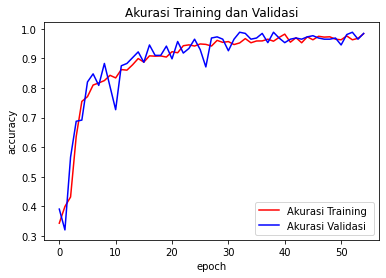

<Figure size 432x288 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt                                                  
acc = history.history['accuracy']                                                 
val_acc = history.history['val_accuracy']                                        
loss = history.history['loss']                                                    
val_loss = history.history['val_loss']                                            

epochs = range(len(acc))                                                        

plt.plot(epochs, acc, 'r', label='Akurasi Training ')                                                
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')                         
plt.title('Akurasi Training dan Validasi')
plt.ylabel('accuracy')
plt.xlabel('epoch')                                       
plt.legend(loc=0)                                                                 
plt.figure()                                                                      
plt.show()

Membuat Grafik Loss

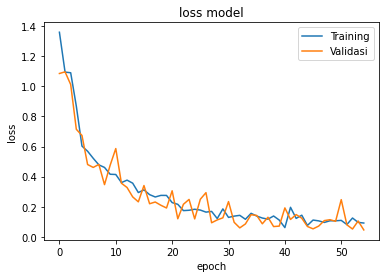

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validasi'], loc='upper right')
plt.show()

Uji Coba Model

In [36]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Upload file local (gambar) untuk diprediksi/uji coba
#Disarankan menggunakan Chrome#

Saving test 5.jpeg to test 5.jpeg
test 5.jpeg
paper


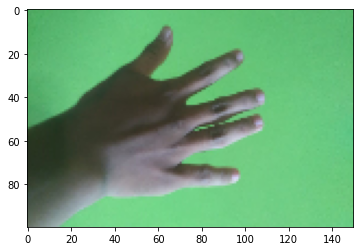

In [39]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
# predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')